In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.cluster import KMeans
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
# from xgboost import XGBClassifier 
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.linear_model import Ridge,Lasso
# from sklearn.metrics import roc_auc_score ,mean_squared_error,recall_score,f1_score,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score
# from scipy.stats.mstats import winsorize
# from sklearn.feature_selection import RFE
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import f_classif
# from sklearn.feature_selection import SelectKBest
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from mlxtend.classifier import StackingClassifier
import datetime
import time
import swifter
import math

In [2]:
CD = pd.read_csv('./Data/CD.csv',sep=',')


In [4]:
CD.head(100)

,UserId,Event,DateTime
0,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-21 10:36:36
1,0000146e97c32d369268e5ba5f4b907c,Registration,2017-02-21 10:36:36
2,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-21 12:16:20
3,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-21 18:16:28
4,0000146e97c32d369268e5ba5f4b907c,UTM Visited,2017-02-21 18:16:28
5,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-21 21:31:40
6,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-22 17:36:48
7,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-22 20:13:20
8,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-23 11:44:24
9,0000146e97c32d369268e5ba5f4b907c,Video Details,2017-02-23 11:46:12


In [4]:
# CD = Combined_Data[['UserId','Event','DateTime']]

In [5]:
# CD.to_csv(path_or_buf='./Data/CD.csv',sep=',',index=False)

In [6]:
CD['DateTime'] = CD['DateTime'].swifter.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))


In [11]:
CD['Month'] = CD['DateTime'].swifter.apply(lambda x : x.month)


In [18]:
chart_data = pd.pivot_table(CD,values='UserId',index='Month',columns='Event',aggfunc='count')

In [19]:
chart_data

Event,App Launched,App Uninstalled,Registration,UTM Visited,Video Details,Video Started
Month,,,,,,
1,403558,66370,40736,94408,294263,108159
2,313051,48854,34923,57720,207161,91763
3,317805,43048,42632,65325,292581,127048
4,530271,62400,80925,98052,746865,373945
5,786782,73821,91589,113322,1373807,622347
6,315989,30678,36469,51751,523083,253616


Text(0, 0.5, 'Count of Occurence')

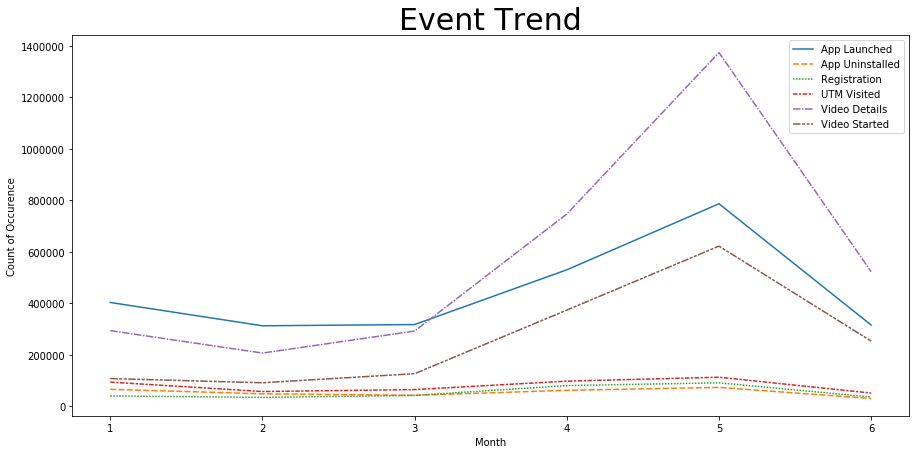

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(data=chart_data)
ax.set_title('Event Trend', fontsize=30)
ax.set_ylabel('Count of Occurence')